# ***Unsupervised ML - Online Retail Customer Segmentation***

Project Type - Unsupervised ML - Online Retail Customer Segmentation

Prepared by - Anurudra Jena

### Project Summarry :

In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The data collection was already completed and can be found in many different data/ML workshop websites. e.g.- Kaggle

Further tasks to be completed are as follows:

1. Preprocessing: Clean and preprocess the data by handling missing values, removing outliers, and normalizing or scaling numerical features.

2. Feature Selection: Selecting appropriate features for clustering that can effectively differentiate customers and capture meaningful patterns. For this project, a subset of relevant features such as customer demographics, purchase behavior, or interaction history will be used.

3. EDA: Creating RFM analysis allows us to compare between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

4. Generating RFM Score: Just before doing any segmentation/clustering, its recommended that we do an EDA on the data to get a firm understanding of the data and its impact on the business.

5. Choosing Clustering Algorithms: Selecting a suitable clustering algorithm based on the nature of the data and project requirements. Commonly used algorithms for customer segmentation include K-means clustering, hierarchical clustering, DBSCAN, or Gaussian mixture models (GMM). But for this project we'll be using K-Means clustering and hierarchical clustering.

6. Evaluation and Validation: The quality of clustering results using appropriate metrics such as inertia, silhouette score, Davies-Bouldin index, or within-cluster sum of squares (WCSS) for K-means will be evaluated. The clusters will be validated by assessing their coherence and interpretability in relation to business objectives and domain knowledge.

## Let's Begin

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from numpy import math
import requests
import os

<ipython-input-1-bd8f6b6dd2a0>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Knowing our dataset

In [2]:
Original_Dataset = "https://docs.google.com/spreadsheets/d/1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD/edit#gid=501524341"
'''
When an excel file is opened for example by MS excel a hidden temporary file is created in the same directory:
~$datasheet.xlsx
So, when I run the code to read all the files from the folder it gives me the error:
ValueError : Excel file format cannot be determined, you must specify an engine manually.
When all files are closed and no hidden temporary files ~$filename.xlsx in the same directory the code works perfectly.

So instead of using the original dataset link provided by the LMS, the dataset was saved as a CSV file in the drive
folder and that CSV file is used to further eliminate the error

'''

df_csv = pd.read_csv("/content/sample_data/Online Retail CSV.csv")

In [3]:
df_csv.shape

(541909, 8)

In [4]:
df_csv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df_csv.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df_csv.duplicated().sum()

5268

In [8]:
df_csv.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

After looking at the dataset for missing and duplicated values, it can be observed that most of them are pretty negligible with respect to the size of the dataset, except for the CustomerID column which has about 135k missing values.

Although it can be said that since the number of missing CustomerID doesn't account for the missing customer sales that didn't happen and we can ofcourse get a greater and much more valid insight if instead of removing those rows, we can add trial customerIDs so that their purchases and inputs can be count for segmentation purpose. Although for the sake of gaining business insights we have to eliminate those customers.

## 1. Data Pre-processing

Detecting outliers and removing them

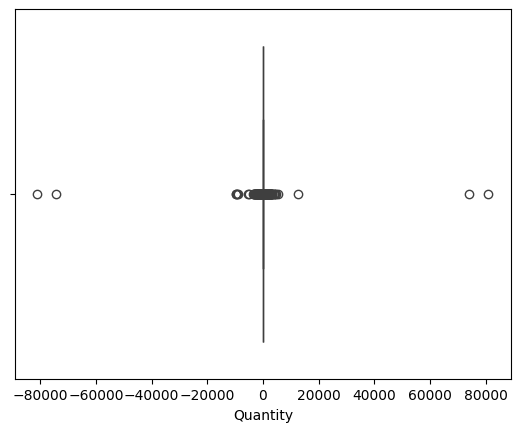

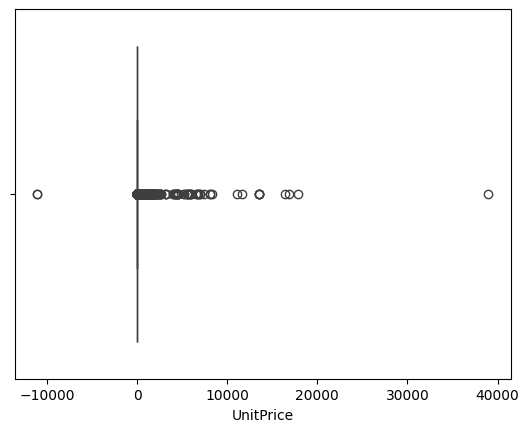

In [9]:
# creating a boxplot to check the price distribution density and analyse the ouliers in the group

sns.boxplot(x = 'Quantity', data = df_csv)
plt.show()

# creating a boxplot to check the Minimum_nights distribution density and analyse the ouliers in the group

sns.boxplot(x = 'UnitPrice', data = df_csv)
plt.show()

In [10]:
# quantifying the price variable in percentiles to check the outliers in the group

df_csv.loc[:,'UnitPrice'].quantile([x for x in np.arange(0.1,1.0,0.1)]+[0.98]+[0.99]+[0.995]+[0.999]+[0.9995]+[0.9999])

0.1000       0.630000
0.2000       0.850000
0.3000       1.250000
0.4000       1.650000
0.5000       2.080000
0.6000       2.550000
0.7000       3.750000
0.8000       4.950000
0.9000       7.950000
0.9800      14.950000
0.9900      18.000000
0.9950      24.960000
0.9990     205.559800
0.9995     464.944620
0.9999    2194.450996
Name: UnitPrice, dtype: float64

In [11]:
# quantifying the Quantity variable in percentiles to check the outliers in the group

df_csv.loc[:,'Quantity'].quantile([x for x in np.arange(0.1,1.0,0.1)]+[0.98]+[0.99]+[0.995]+[0.999]+[0.9995]+[0.9999])

0.1000       1.00
0.2000       1.00
0.3000       2.00
0.4000       2.00
0.5000       3.00
0.6000       5.00
0.7000       8.00
0.8000      12.00
0.9000      24.00
0.9800      72.00
0.9900     100.00
0.9950     160.00
0.9990     468.92
0.9995     620.00
0.9999    1440.00
Name: Quantity, dtype: float64

In [12]:
# Keeping the data upto 99.5 percentile
df_csv = df_csv[(df_csv['UnitPrice'] <= df_csv['UnitPrice'].quantile(0.9950))]

In [13]:
# Keeping the data upto 99 percentile
df_csv = df_csv[(df_csv['Quantity'] <= df_csv['Quantity'].quantile(0.9900))]

In [14]:
df_csv.drop_duplicates(inplace=True)

Handling mising values

In [15]:
# removing the 1454 null values from Description column

df_fil = df_csv[df_csv['Description'].notna()]

Then we have a DF where only the CustomerID column will be having null values.

Lets create a custom function which will replace null values with random numbers
within a specified range so that we can still have the sales data without relying on customer information.
Since earlier we saw that the CustomerID values lie within 12346-18287, we can mention the range for randomness as 20000-90000, o that in our final dataframe, any customer having ID within that range can be determined as non-definitive and was missing an ID.

In [16]:
def fill_empty_with_random(df):
    for col in df.columns:
        if df[col].isna().any():
            np.issubdtype(df[col].dtype, np.number)
            random_values = np.random.randint(20000, 90000, size=len(df))

            df[col].fillna(pd.Series(random_values), inplace=True)

    return df

df_fil = fill_empty_with_random(df_fil)

<ipython-input-16-b1e085202980>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(pd.Series(random_values), inplace=True)


In [17]:
df_fil.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     5652
Country           0
dtype: int64

As we can see that earlier the number of null values in CustomerID was 133310, and now its just 5652 which is quite negligible and can be directly removed.

In [18]:
df_fil = df_fil[df_fil['CustomerID'].notna()]

We saw that the 'InvoiceNo' column is in Object type dtype, and to determine valid orders, we can convert it into string dtype and check for cancelled orders

In [19]:
df_fil['InvoiceNo'] = df_fil['InvoiceNo'].astype('str')

<ipython-input-19-c9122d53c7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['InvoiceNo'] = df_fil['InvoiceNo'].astype('str')


In [20]:
# Rremoving cancelled orders:
# Orders with 'C' in InvoiceNo column.

df_fil = df_fil[~df_fil['InvoiceNo'].str.contains('C')]

Now, we have to only consider all the orders which has items with UnitPrice more than zero.

In [21]:
df_final = df_fil[df_fil['UnitPrice']>0]

In [22]:
df_final.shape

(512142, 8)

In [23]:
df_final.describe()

,Quantity,UnitPrice,CustomerID
count,512142.000000,512142.000000,512142.000000
mean,8.070484,3.204157,25005.716018
std,12.661617,3.223063,19848.205379
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,14344.000000
50%,4.000000,2.080000,16225.000000
75%,10.000000,4.130000,18226.000000
max,100.000000,24.960000,89999.000000


In [24]:
df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


The outliers from the UnitPrice and Quantity column has been rermoved and the missing values from the CustomerID and Description has been handled.

In addition to that, the cancelled orders and the orders with zero UnitPrice has also been removed.

## 2. Feature Selection

In order to gain inights and generate RFM scores for classification, we have to create date-time features out of Invoice Date.

In [25]:
df_final['InvoiceDate'] = pd.to_datetime(df_final['InvoiceDate'])

<ipython-input-25-8b453bf9de27>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final['InvoiceDate'] = pd.to_datetime(df_final['InvoiceDate'])
<ipython-input-25-8b453bf9de27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['InvoiceDate'] = pd.to_datetime(df_final['InvoiceDate'])


In [26]:
df_final['day'] = df_final['InvoiceDate'].dt.day_name()
df_final['year'] = df_final['InvoiceDate'].apply(lambda x: x.year)
df_final['month_num'] = df_final['InvoiceDate'].apply(lambda x: x.month)
df_final['day_num'] = df_final['InvoiceDate'].apply(lambda x: x.day)
df_final['hour'] = df_final['InvoiceDate'].apply(lambda x: x.hour)
df_final['minute'] = df_final['InvoiceDate'].apply(lambda x: x.minute)
df_final['month'] = df_final['InvoiceDate'].dt.month_name()

<ipython-input-26-70319810b364>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day'] = df_final['InvoiceDate'].dt.day_name()
<ipython-input-26-70319810b364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year'] = df_final['InvoiceDate'].apply(lambda x: x.year)
<ipython-input-26-70319810b364>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [28]:
df_f = df_final
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512142 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    512142 non-null  object        
 1   StockCode    512142 non-null  object        
 2   Description  512142 non-null  object        
 3   Quantity     512142 non-null  int64         
 4   InvoiceDate  512142 non-null  datetime64[ns]
 5   UnitPrice    512142 non-null  float64       
 6   CustomerID   512142 non-null  float64       
 7   Country      512142 non-null  object        
 8   day          512142 non-null  object        
 9   year         512142 non-null  int64         
 10  month_num    512142 non-null  int64         
 11  day_num      512142 non-null  int64         
 12  hour         512142 non-null  int64         
 13  minute       512142 non-null  int64         
 14  month        512142 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64

## 4.Conducting EDA

**Top 10 Highest selling products**

In [32]:
top10_products = df_f['Description'].value_counts().reset_index().head(10)
print(top10_products)

                          Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2268
1             JUMBO BAG RED RETROSPOT   2041
2            REGENCY CAKESTAND 3 TIER   1951
3                       PARTY BUNTING   1677
4             LUNCH BAG RED RETROSPOT   1571
5       ASSORTED COLOUR BIRD ORNAMENT   1415
6   SET OF 3 CAKE TINS PANTRY DESIGN    1379
7             LUNCH BAG  BLACK SKULL.   1291
8     PACK OF 72 RETROSPOT CAKE CASES   1265
9     NATURAL SLATE HEART CHALKBOARD    1243


Plotting the above data to get a perspective.

<Axes: xlabel='count', ylabel='Description'>

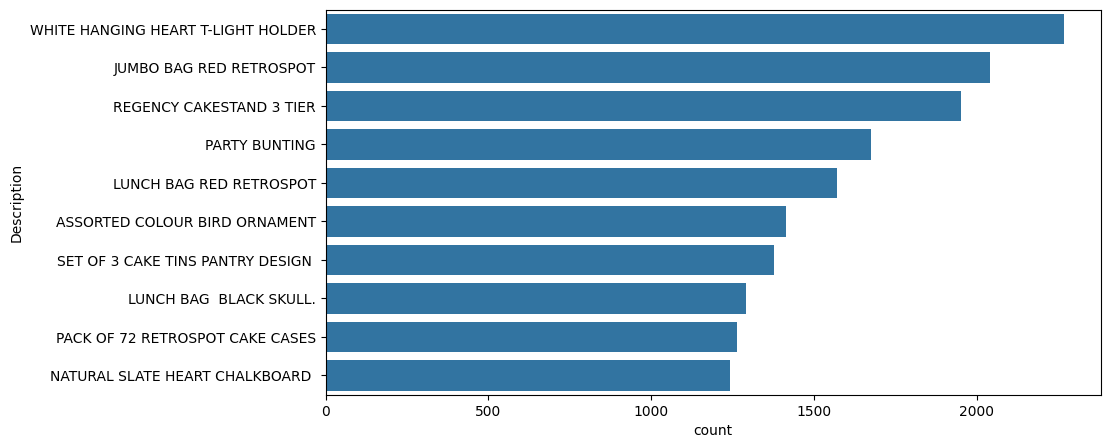

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(x= top10_products['count'], y = top10_products['Description'])

Observation :        
Top 5 most sold products and their quantity are
1.  WHITE HANGING HEART T-LIGHT HOLDER   2268
2.             JUMBO BAG RED RETROSPOT   2041
3.            REGENCY CAKESTAND 3 TIER   1951
4.                       PARTY BUNTING   1677
5.             LUNCH BAG RED RETROSPOT   1571

Suggestion:
As we know the top selling products of the catalogue, better supply-chain management can be suggested to hit the shelves with those items for faster delivery and optimised restoration.

**Top 10 spending Customers**

In [34]:
top10_customers = df_f['CustomerID'].value_counts().reset_index().head(10)
print(top10_customers)

   CustomerID  count
0     17841.0   7653
1     14911.0   5518
2     14096.0   5091
3     12748.0   4383
4     14606.0   2672
5     15311.0   2336
6     13089.0   1798
7     13263.0   1667
8     14298.0   1572
9     14646.0   1500


Remember, we had put some random customerID values... ??

The range for Random values were from 20000 to 99999, and as we can see none of the top 10 customers are having customer_ID in that range, we can say that our drive to save the data didn't hamper any insights.

Now lets plot the above data and get some perspective. We can use Bar chart as the data is quite normalized.

<Axes: xlabel='CustomerID', ylabel='count'>

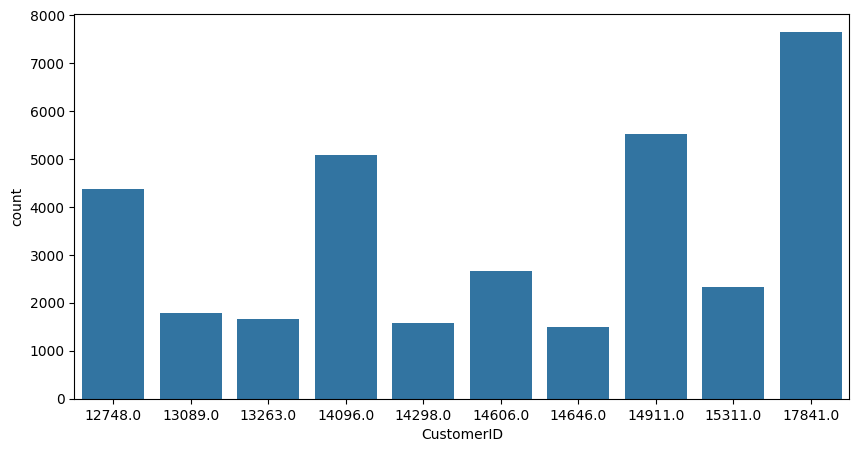

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x= top10_customers['CustomerID'], y = top10_customers['count'])

Top 5 most frequent customers are:

1.     17841  >> 7653
2.     14911  >> 5518
3.     14096  >> 5091
4.     12748  >> 4383
5.     14606  >> 2672


Suggestions:

Accostumed loyalty programs for customers should be implemented to keep the mosst engaged customers even engaged more.

**Top 5 buying countries**

In [36]:
top5_countries = df_f['Country'].value_counts().reset_index().head(6)
print(top5_countries)

          Country   count
0  United Kingdom  469077
1         Germany    8955
2          France    8321
3            EIRE    7544
4           Spain    2394
5         Belgium    2021


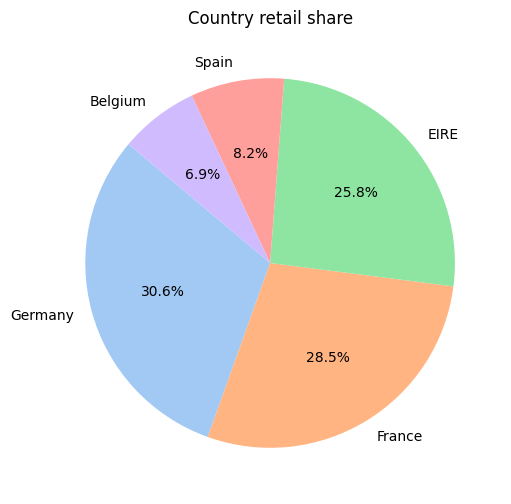

In [37]:
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel')
plt.pie(top5_countries['count'][1:], labels=top5_countries['Country'][1:], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Country retail share')
plt.show()

Observation:
We can certainly ssee that UK holds the major portion of the revenue stream for the retail store.
But other than UK, if we want to know the percentage of revenue streams generated by other top 5 countries :

1.         Germany    8955
2.         France    8321
3.           EIRE    7544
4.          Spain    2394
5.        Belgium    2021


Suggestions:
Different pricedrop & flash sales on special occasions can help increase revenue stream from different countries. Sales can be curated by having Customer base analysed with their spending habits.

**Monthly retail sales**

In [38]:
monthly_sales = df_f['month'].value_counts().reset_index()
print(monthly_sales)

        month  count
0    November  81162
1    December  59276
2     October  57782
3   September  48273
4        July  37858
5         May  35403
6        June  35125
7       March  34942
8      August  33715
9     January  33612
10      April  28498
11   February  26496


Plotting the above data:

Text(0.5, 1.0, 'Sales count on different months')

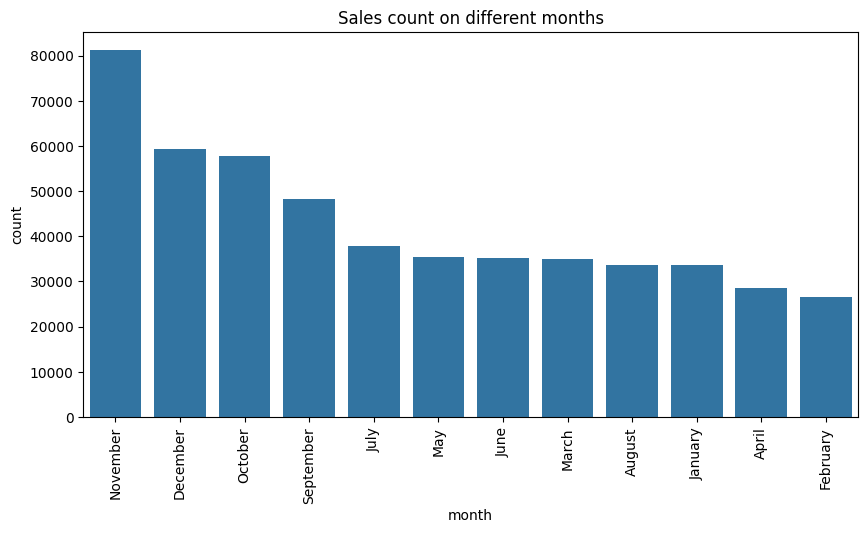

In [39]:
plt.figure(figsize = (10,5))
sns.barplot(x= monthly_sales['month'], y = monthly_sales['count'])
plt.xticks(rotation = 90)
plt.title("Sales count on different months")

Months with highest sales:

1.    November  81162
2.    December  59276
3.     October  57782
4.   September  48273
5.        July  37858

As we can see from the above plot that the sales revenue is higher towards the 3rd and 4th quarter which indicates that people buy more gifts as going towards the Fall seasson.

**Day-to-Day sales**

In [40]:
daily_sales = df_f['day'].value_counts().reset_index()
print(daily_sales)

         day  count
0    Tuesday  96548
1   Thursday  96261
2  Wednesday  89902
3     Monday  89841
4     Friday  77583
5     Sunday  62007


Plotting the abpve data for better insights.

Text(0.5, 1.0, 'Sales count on different days')

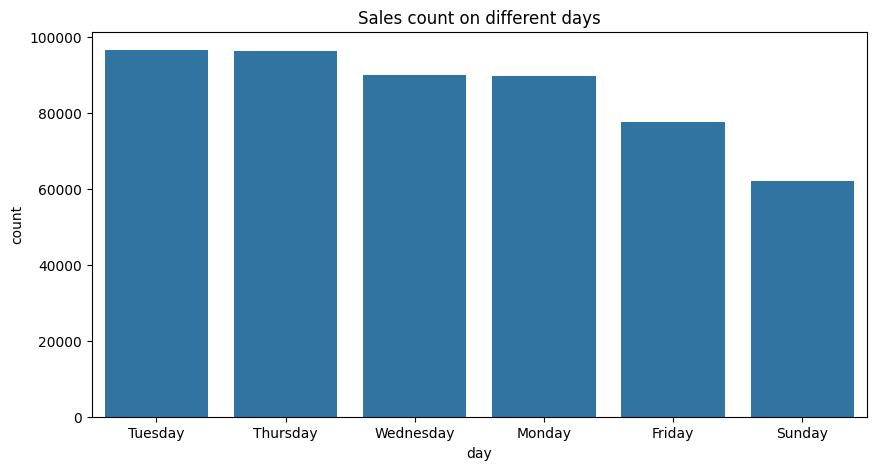

In [41]:
plt.figure(figsize = (10,5))
sns.barplot(x= daily_sales['day'], y = daily_sales['count'])
plt.title("Sales count on different days")

Observation:
As we can see that the sales figures are high in the mid-week region, it can be depicted that people want their gift to arrive by weekend, since it is an online retail store, it'll take some time to deliver those gifts.

Suggestion:
Flash sales on Tuesdays/Wednesdays can help upbring the sales figure more.

**Time of the day sales figures**

In [42]:
df_f['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [43]:
def day_time(time):
  if time>=6 and time<=11:
    return "Morning"
  elif time>=12 and time<= 17:
    return "Afternoon"
  else: return "Evening"

df_f['DayTime'] = df_f['hour'].apply(day_time)

<ipython-input-43-71ed80ef7271>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['DayTime'] = df_f['hour'].apply(day_time)


In [44]:
sales_time = df_f['DayTime'].value_counts().reset_index()
print(sales_time)

     DayTime   count
0  Afternoon  360306
1    Morning  140150
2    Evening   11686


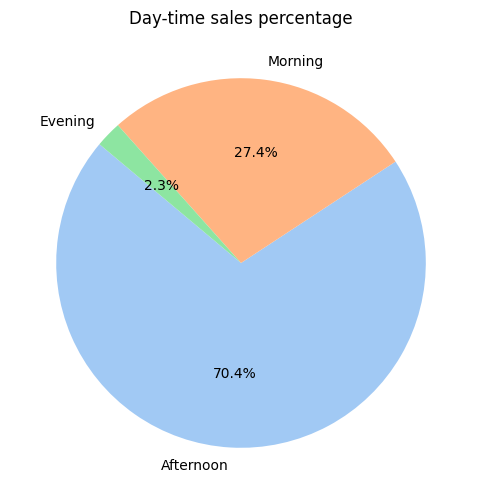

In [45]:
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel')
plt.pie(sales_time['count'], labels=sales_time['DayTime'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Day-time sales percentage')
plt.show()

From the above pie, we can see that most of the sales happen in the Afternoon followed by Morning.

Suggestion: Sales for the least sold items can be promoted during this time as the visitors are to be maximum during this period.

**Average amount spent by each customer**

In [29]:
df_f['TotalAmount'] = df_f['Quantity']*df_f['UnitPrice']

<ipython-input-29-386d91f98019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['TotalAmount'] = df_f['Quantity']*df_f['UnitPrice']


In [47]:
avg_amt = df_f.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns = {'TotalAmount':'Avg_amt_per_customer'}).sort_values('Avg_amt_per_customer', ascending = False).head(10)
avg_amt

,CustomerID,Avg_amt_per_customer
26671,46809.0,699.300000
15301,33175.0,699.000000
24449,44162.0,673.920000
44886,68681.0,582.750000
3583,17291.0,550.800000
26546,46658.0,528.710000
2154,15299.0,527.850000
2690,16041.0,495.666667
62658,89950.0,485.100000
46913,71098.0,465.300000


Plotting the top 10 values of the above data:

Text(0.5, 1.0, 'Average amount spent by the top 10 customers')

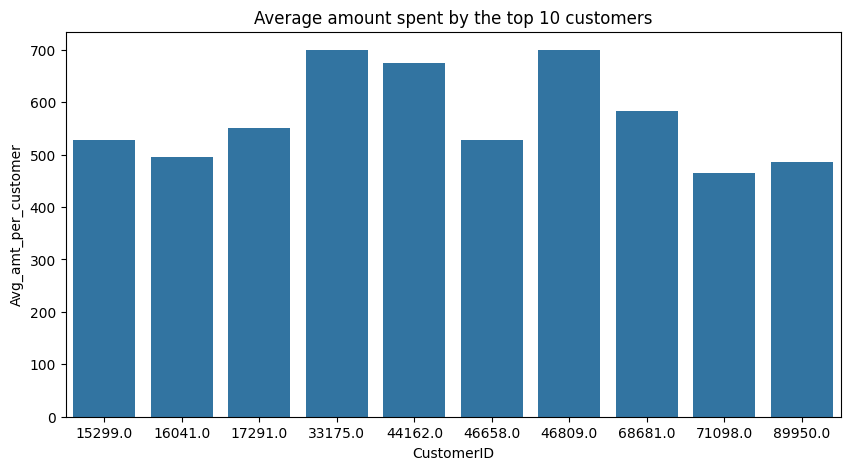

In [48]:
plt.figure(figsize = (10,5))
sns.barplot(x= avg_amt['CustomerID'], y = avg_amt['Avg_amt_per_customer'])
plt.title("Average amount spent by the top 10 customers")

From the above plot we can depict the average amount spent by a customer who is not a wholeseller.

Special discount rates and offers can be introduced to amp up the sales amount in this category.

Demand Curve :

<Axes: xlabel='Quantity', ylabel='TotalAmount'>

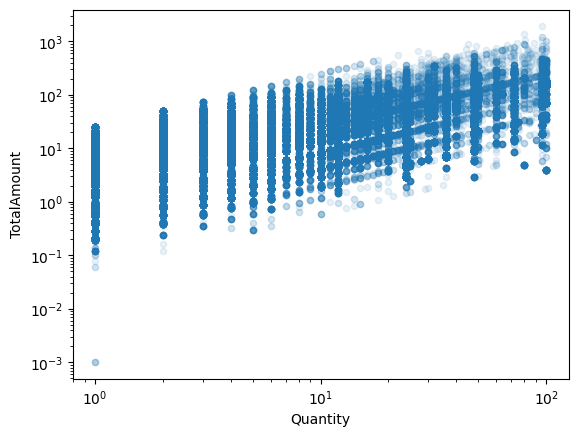

In [49]:
df_f.query("TotalAmount < 10000 & TotalAmount > 0 & Quantity > 0").plot(x = 'Quantity', y = 'TotalAmount', kind = 'scatter', loglog = True, alpha = 0.1)

There is an expected positive relationship between Quantity and price.
Both the axes are in log scale.

Suggestion: Offering discounts and sales with coupled items/ more number of items will help keep up this trend.

Daily sales value : Time series data

In [50]:
daily_sales = df_f.groupby("InvoiceDate")["TotalAmount"].sum()
daily_sales

InvoiceDate
2010-12-01 08:26:00    139.12
2010-12-01 08:28:00     22.20
2010-12-01 08:34:00    348.78
2010-12-01 08:35:00     17.85
2010-12-01 08:45:00    855.86
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: TotalAmount, Length: 17988, dtype: float64

<Axes: title={'center': 'Total sales - Daily Frequency'}, xlabel='InvoiceDate'>

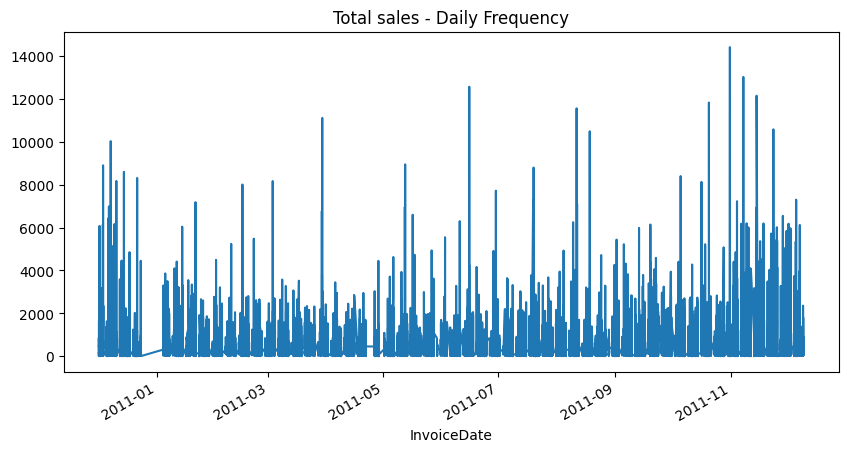

In [51]:
plt.figure(figsize = (10,5))
daily_sales.plot(title = "Total sales - Daily Frequency")

Item level sales quantity and price analysis

In [52]:
agg_item = (df_f.groupby('StockCode')[['TotalAmount','Quantity','UnitPrice']].agg(['mean','median']))
new_columns = ["_".join(cols) for cols in agg_item.columns]
agg_item.columns = new_columns
agg_item.head()

,TotalAmount_mean,TotalAmount_median,Quantity_mean,Quantity_median,UnitPrice_mean,UnitPrice_median
StockCode,,,,,,
10002,8.056377,3.40,8.985507,4.0,1.093478,0.85
10080,5.413182,4.68,13.772727,12.0,0.410909,0.39
10120,1.390345,1.05,6.620690,5.0,0.210000,0.21
10123C,1.083333,0.65,1.666667,1.0,0.650000,0.65
10124A,1.344000,1.68,3.200000,4.0,0.420000,0.42


##4. Generating RFM Scores

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category. These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much money a customer spends on purchases
Since UK holds the significant share of sales, we can only focus on the UK Customers

In [30]:
df_f.shape

(512142, 16)

In [31]:
df_uk = df_f[df_f['Country'] == 'United Kingdom']

# print the shape of the data
df_uk.shape

(469077, 16)

In [32]:
df_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,year,month_num,day_num,hour,minute,TotalAmount
count,469077.000000,469077,469077.000000,469077.000000,469077.000000,469077.000000,469077.000000,469077.000000,469077.000000,469077.000000
mean,7.462924,2011-07-02 14:11:50.460926720,3.202456,25968.800847,2010.918666,7.520512,15.109362,13.175711,29.979658,14.771021
min,1.000000,2010-12-01 08:26:00,0.001000,12747.000000,2010.000000,1.000000,1.000000,6.000000,0.000000,0.001000
25%,1.000000,2011-03-25 10:52:00,1.250000,14606.000000,2011.000000,5.000000,7.000000,11.000000,16.000000,3.400000
50%,3.000000,2011-07-17 15:45:00,2.100000,16592.000000,2011.000000,8.000000,15.000000,13.000000,30.000000,8.420000
75%,10.000000,2011-10-18 13:04:00,4.130000,23607.000000,2011.000000,11.000000,22.000000,15.000000,44.000000,16.630000
max,100.000000,2011-12-09 12:49:00,24.960000,89999.000000,2011.000000,12.000000,31.000000,20.000000,59.000000,1914.240000
std,11.934364,NaN,3.193730,20316.308093,0.273348,3.506889,8.695042,2.405730,16.983147,26.189978


In [33]:
# To calculate the RFM, we need to select a date from which we can calculate the RFM, and since it is an old dataset, we can select a date with respect to the max date of the data set.

latest_date = dt.datetime(2011,12,10)

rfm_uk = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})
rfm_uk['InvoiceDate'] = rfm_uk['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_uk.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

In [34]:
rfm_uk.describe()

,Recency,Frequency,Monetary
count,61907.000000,61907.000000,61907.000000
mean,124.269178,7.577124,111.921851
std,109.031827,57.513371,912.197304
min,0.000000,1.000000,0.290000
25%,28.000000,1.000000,5.910000
50%,92.000000,2.000000,13.410000
75%,198.000000,3.000000,28.970000
max,373.000000,7653.000000,71615.640000


Lets plot the RFM data to get a better perspective about the distribution:

<ipython-input-40-92dccc6f39d3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-40-92dccc6f39d3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_uk[feature])
<ipython-input-40-92dccc6f39d3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to 

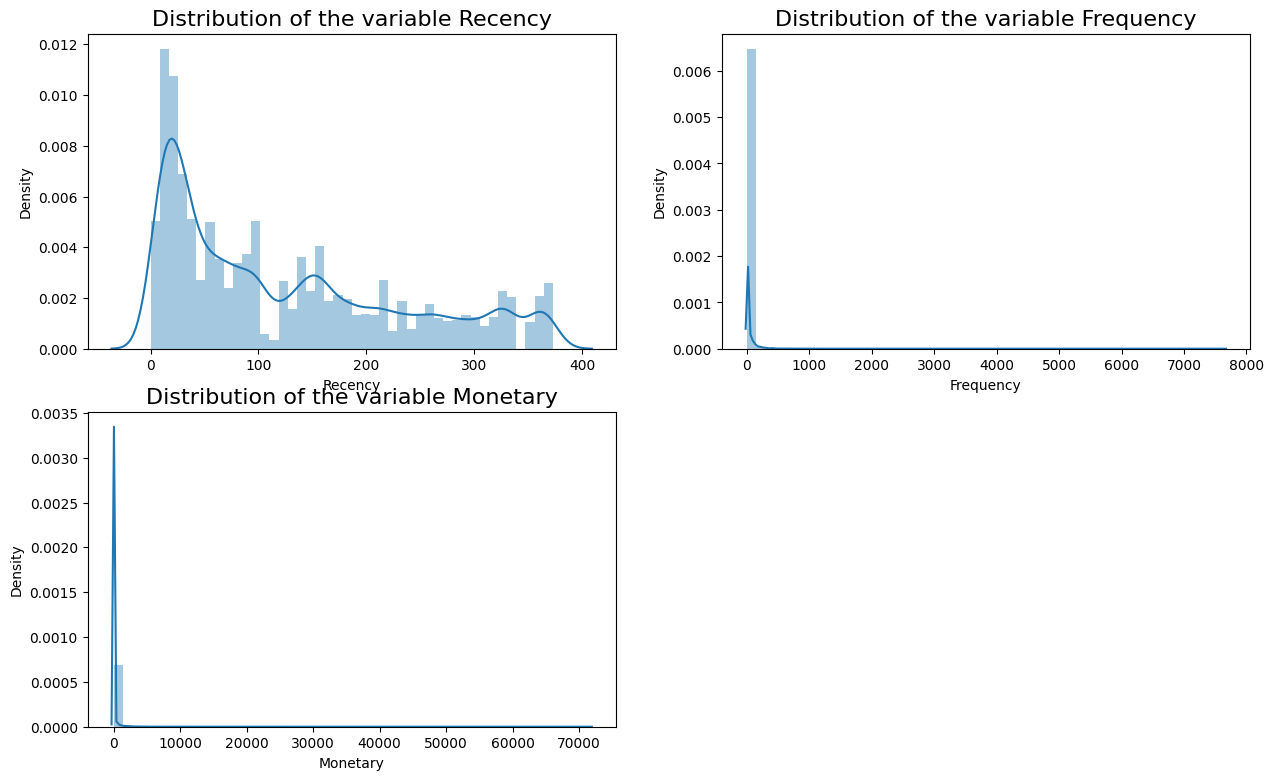

In [40]:
count = 1
plt.subplots(figsize=(15,9))
for feature in rfm_uk:
  plt.subplot(2,2,count)
  sns.distplot(rfm_uk[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

We see that the distribution is uneven, and skewed for Recency and Frequency. To normalize the curves, we can apply Log Transformation to Normalize the data.

In [35]:
# since we do not see any negative values in the RFM scorre dataset, but we can ssee zerro value, we can convert all zero values to 1
# and directly apply log Transformation to the RFM values

def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_uk['Recency'] = [handle_negative(x) for x in rfm_uk['Recency']]
rfm_uk['Monetary'] = [handle_negative(x) for x in rfm_uk['Monetary']]
log_df = rfm_uk[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

In [36]:
log_df.describe()

,Recency,Frequency,Monetary
count,61907.000000,61907.000000,61907.000000
mean,4.273967,0.807338,2.719167
std,1.198987,0.957146,1.477164
min,0.000000,0.000000,-1.238000
25%,3.332000,0.000000,1.777000
50%,4.522000,0.693000,2.596000
75%,5.288000,1.099000,3.366000
max,5.922000,8.943000,11.179000


<ipython-input-43-bacaf67989e1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-43-bacaf67989e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_df[feature])
<ipython-input-43-bacaf67989e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to 

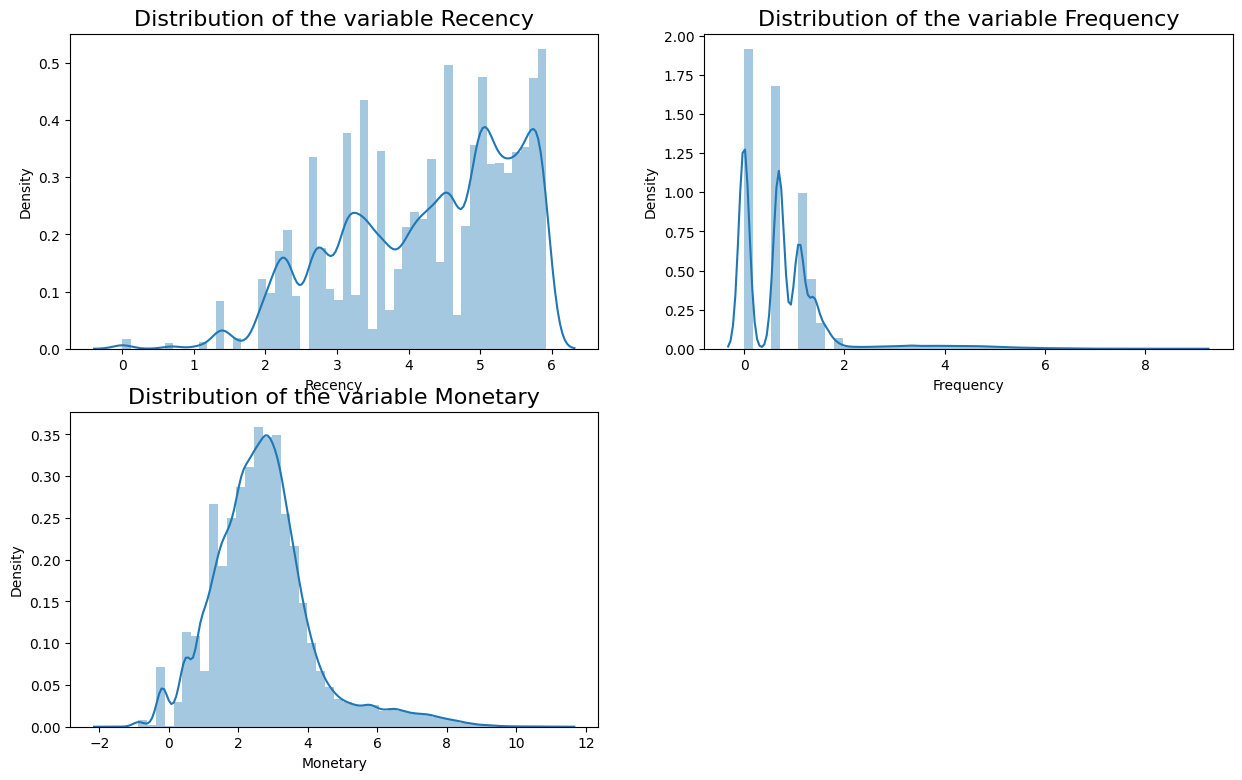

In [43]:
count = 1
plt.subplots(figsize=(15,9))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [37]:
#Applying log transformation to the original RFM values

rfm_uk['Recency_log'] = rfm_uk['Recency'].apply(math.log)
rfm_uk['Frequency_log'] = rfm_uk['Frequency'].apply(math.log)
rfm_uk['Monetary_log'] = rfm_uk['Monetary'].apply(math.log)

In [38]:
rfm_uk.describe()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
count,61907.000000,61907.000000,61907.000000,61907.000000,61907.000000,61907.000000
mean,124.269582,7.577124,111.921851,4.273990,0.807348,2.719167
std,109.031369,57.513371,912.197304,1.198984,0.957146,1.477165
min,1.000000,1.000000,0.290000,0.000000,0.000000,-1.237874
25%,28.000000,1.000000,5.910000,3.332205,0.000000,1.776646
50%,92.000000,2.000000,13.410000,4.521789,0.693147,2.596001
75%,198.000000,3.000000,28.970000,5.288267,1.098612,3.366261
max,373.000000,7653.000000,71615.640000,5.921578,8.942853,11.179069


In [47]:
# Scaling the data
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# from sklearn import metrics
# from yellowbrick.cluster import KElbowVisualizer

X_features = rfm_uk[['Recency_log', 'Frequency_log', 'Monetary_log']].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

As the data iss ready for clutering, it is vital to determine the number of clusters to form with the customers.

We'll be using Elbow/Silhouette method to determine the number of clusters needed.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

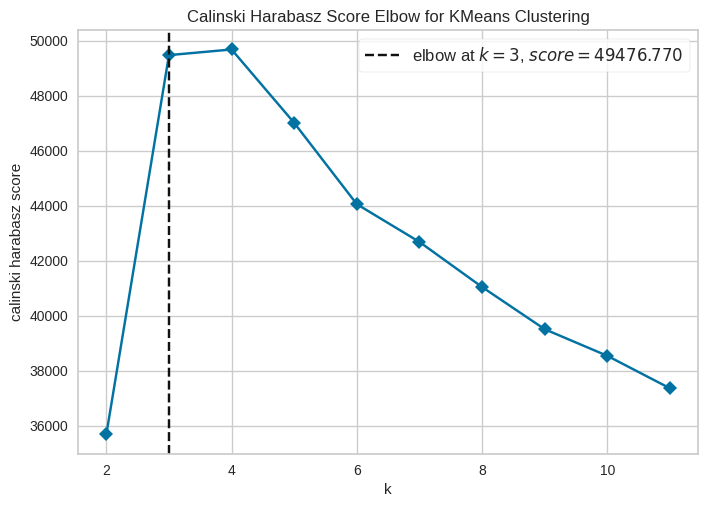

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [48]:
# implementing Elbow method
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,12), metric = 'calinski_harabasz', timings = False)

visualizer.fit(X)
visualizer.show()

By Elbow Method, Ideal number of clusters for this data is 3.

Validating the result with Silhouette score, then we can finalize the number of clusters and conduct Kmeans Clustering

In [62]:
# calculating Silhouette Score
from sklearn.metrics import silhouette_score


cluster_num =  [2,3,4,5,6,7,8,9]
for num in cluster_num:
  clusterer = KMeans(n_clusters = num , random_state = 1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X,preds)
  print(f"For Cluster no. {num}, Silhouette score is : {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 2, Silhouette score is : 0.37115853584368763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 3, Silhouette score is : 0.392804479761389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 4, Silhouette score is : 0.34842167622238956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 5, Silhouette score is : 0.3344928696402701


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 6, Silhouette score is : 0.33343815184586106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 7, Silhouette score is : 0.2880828534222182


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 8, Silhouette score is : 0.2836177232017939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For Cluster no. 9, Silhouette score is : 0.2772158268141091


Silhouette score is highest for n-Cluster = 3.

So we can keep the number of clusters to be 3 and move further.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 cluster label,
The average silhouette score is : 0.37115853584368763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 cluster label,
The average silhouette score is : 0.392804479761389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 cluster label,
The average silhouette score is : 0.34842167622238956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 cluster label,
The average silhouette score is : 0.3344928696402701


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 cluster label,
The average silhouette score is : 0.33343815184586106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 cluster label,
The average silhouette score is : 0.2880828534222182


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 cluster label,
The average silhouette score is : 0.2836177232017939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 cluster label,
The average silhouette score is : 0.2772158268141091


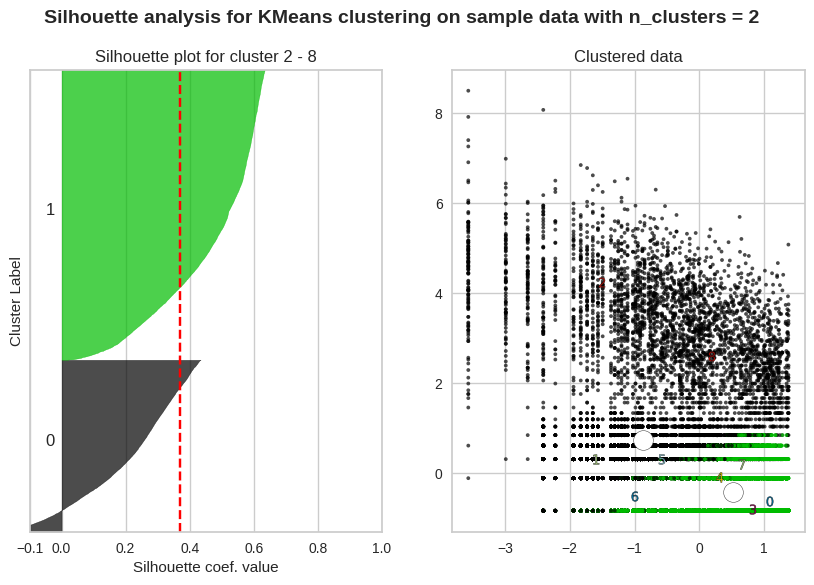

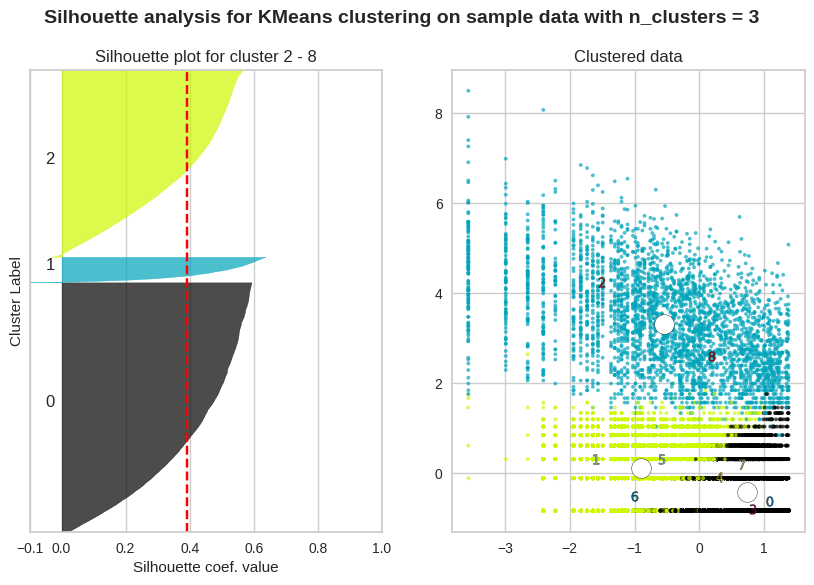

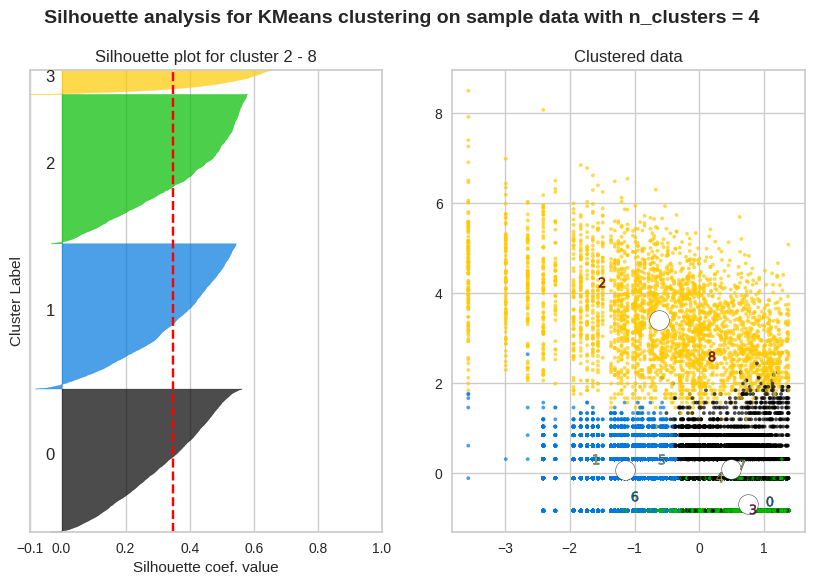

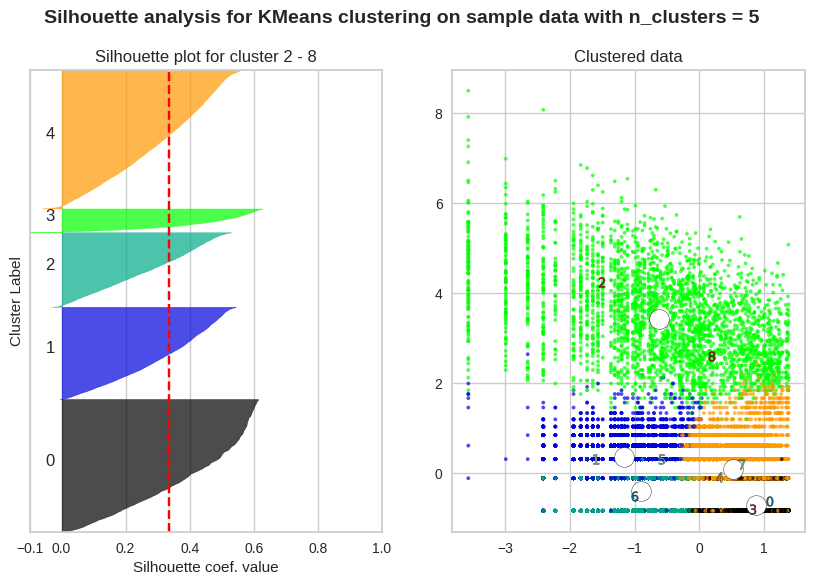

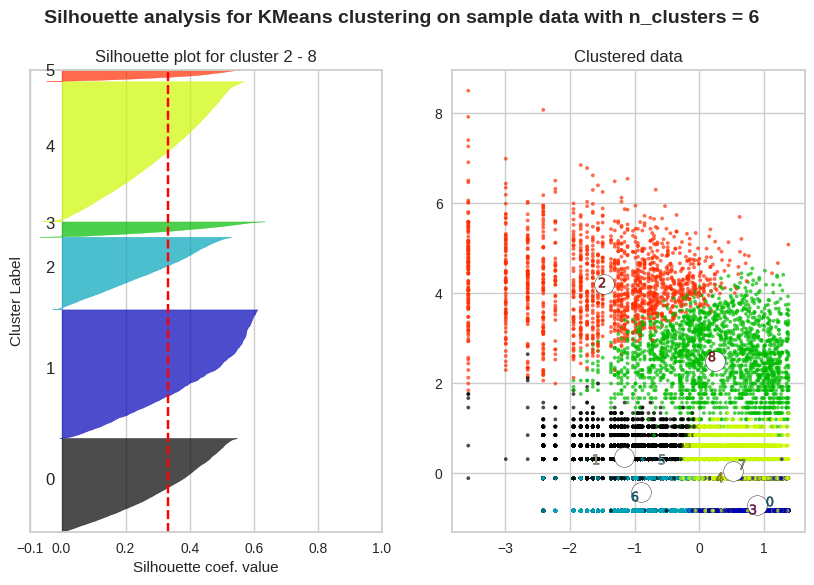

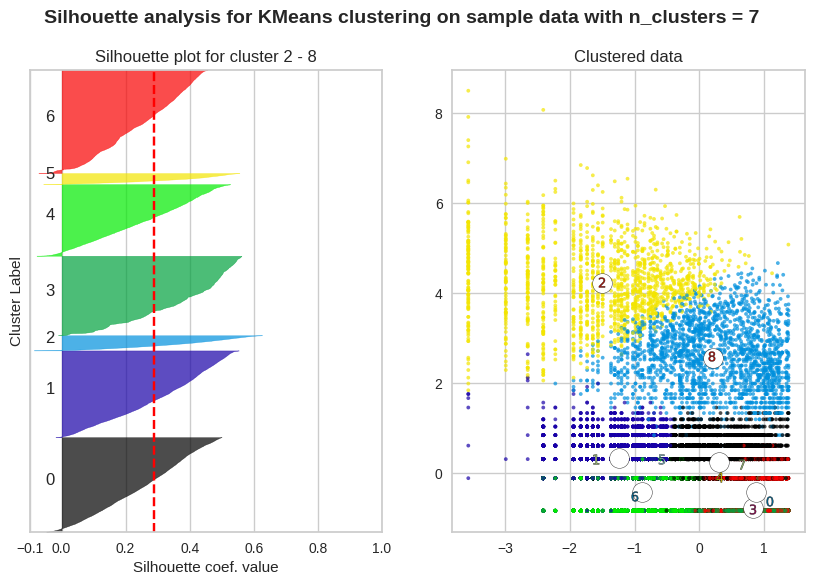

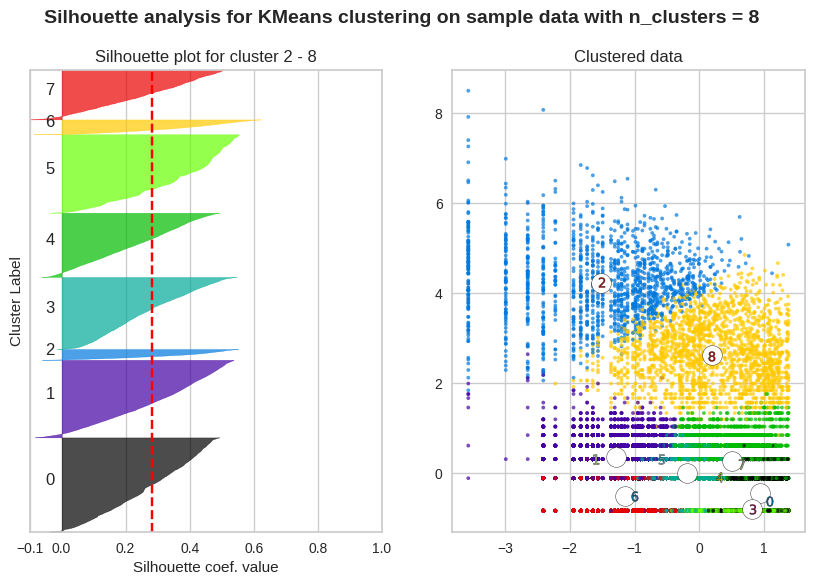

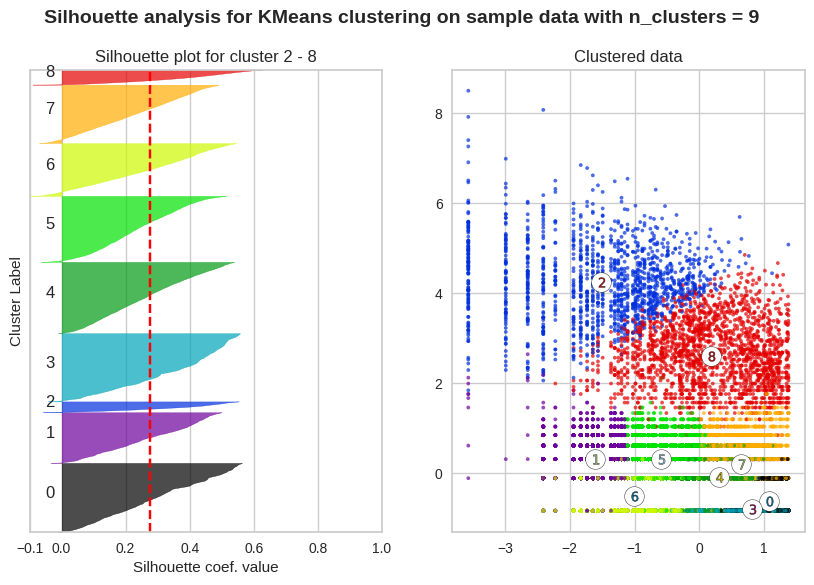

In [63]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

for num in cluster_num:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(10,6)
  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0,len(X)+(num+1)*10])

  clusterer2  = KMeans(n_clusters = num, random_state = 1)
  cluster_labels = clusterer2.fit_predict(X)

  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"For {num} cluster label,\nThe average silhouette score is : {silhouette_avg}")

  # calculate teh silhouette score for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  y_lower = 10
  for i in range(num):
    # aaggregating the sil-scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
      sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i)/num)
    ax1.fill_betweenx(np.arange(y_lower,y_upper), 0 , ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
    # Labelling silhouette plots with their clusterrsnumber at the middle
    ax1.text(-0.05 , y_lower + 0.5 * size_cluster_i , str(i))

    # Computing the new y_lower for next plot
    y_lower = y_upper + 10

  ax1.set_title("Silhouette plot for cluster 2 - 8")
  ax1.set_xlabel("Silhouette coef. value")
  ax1.set_ylabel("Cluster Label")

  # Drawing vertical lines for aaaverage silhouette score of all clusters
  ax1.axvline(x=silhouette_avg, color = 'red', linestyle = "--")
  ax1.set_yticks([])
  ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

  # 2nd plot showing clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float)/num)
  ax2.scatter(X[:,0], X[:,1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')
  centers2 = clusterer2.cluster_centers_
  ax2.scatter(centers2[:,0],centers2[:,1], marker = 'o', c = "white", alpha = 1, s=200, edgecolor = 'k')

  for i,c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker = '$%d$'% i, alpha = 1, s = 50, edgecolor = 'k')
    ax2.set_title('Clustered data')
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d "% num),fontsize =14, fontweight = 'bold')

plt.show()

Now as the number of clusterrs is confirmed to be 3, we can move on to clustering.

##5. Clustering Algorithm & Segmentation

### K-Means Clustering

In [51]:
# With n_cluster as 3 for clustering:
KM1 = KMeans(n_clusters = 3)
KM1.fit(X)
y_KM1 = KM1.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
# Centers of the clusters :

centers3 = KM1.cluster_centers_
centers3

array([[ 0.72883842, -0.42048959, -0.41479176],
       [-0.90629404,  0.11311193,  0.18803256],
       [-0.53963904,  3.29571793,  2.69422713]])

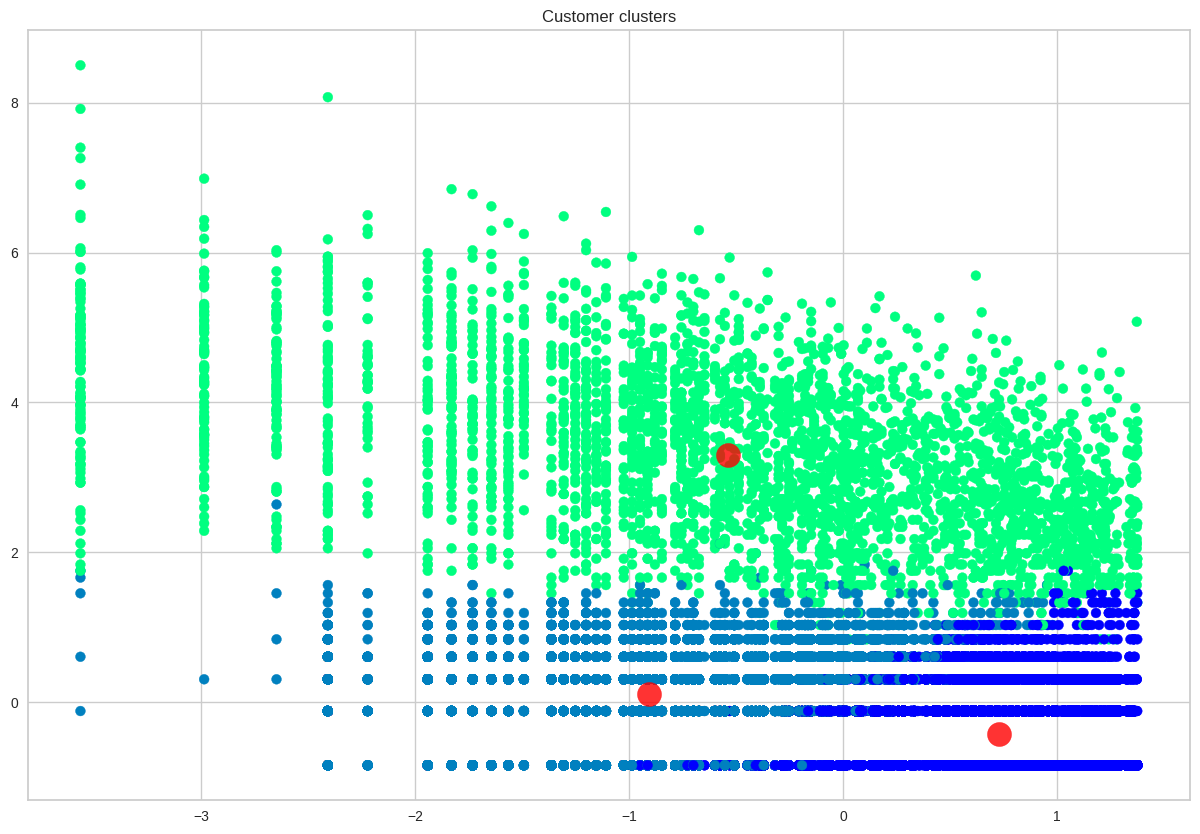

In [53]:
# Plotting and visualizing the clusters

plt.figure(figsize = (15,10))
plt.title("Customer clusters")
plt.scatter(X[:,0], X[:,1], c = y_KM1, s = 50, cmap = 'winter')
centers3 = KM1.cluster_centers_

plt.scatter(centers3[:,0], centers3[:,1], c = 'red', s = 300, alpha = 0.8)


AAs we can see the clusters are pretty coinciding, we can head for DBSCAN and Heirarchial Clustering algorithms for better accuracy.

##DBSCAN Clustering

In [74]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps = 0.5, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels))-(1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters = %d" %n_clusters)
print("Estimated number of noise points = %d" %n_noise)
print("Silhouette Coefficient : %0.3f" % metrics.silhouette_score(X,labels))


Estimated number of clusters = 3
Estimated number of noise points = 78
Silhouette Coefficient : 0.219


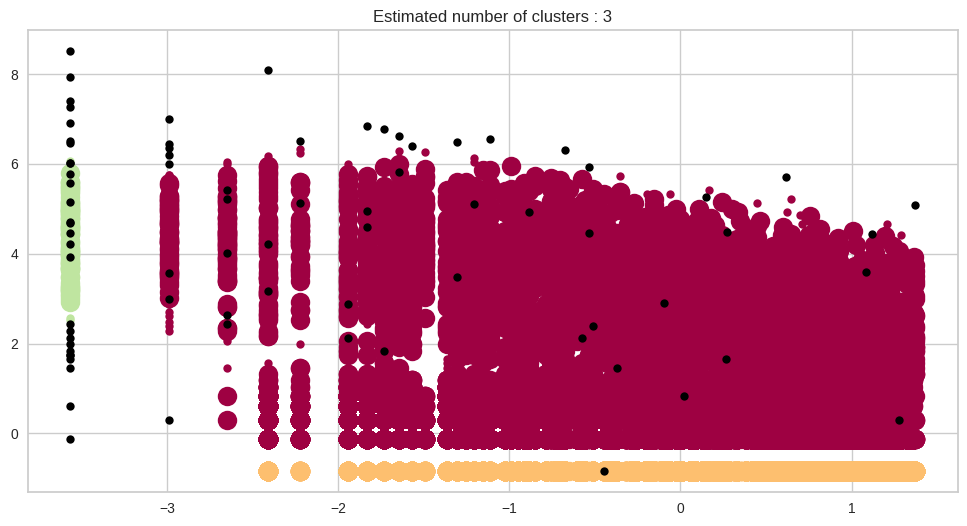

In [75]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
  if k ==-1:
    col = [0,0,0,1]
  class_member_mask = labels == k
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'k', markersize = 14)
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'k', markersize = 6)
plt.title("Estimated number of clusters : %d" % n_clusters)
plt.show()

As we can see that the clustering from DBSCAN varies significantly from that of KMeans, we can also try with Hieraarchial clustering to have more assured clustering.


## Hierarchial Clustering algorithm

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,9))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidian Distances')
plt.axhline(y = 80, color = 'r', linestyle = '--')
plt.show()


As the system crashed a number of times while determining the number of clusters while plotting Dendrogam for Hierarchial Clustering, we can consider the number of clusters to be 3 and move on to clustering and segmentation.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

# Visualizing the clusters :

plt.figure(figsize = (12,7))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s=100, c = 'green', label = 'Cluster 3')

plt.title("Customer Clusters")
plt.xlabel("RFM")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##The system crashed again !!!

## Grouping the RFM scores with clusters

Splitting the RFM values to 4 quantiles:

In [41]:
rfm_uk.describe()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
count,61907.000000,61907.000000,61907.000000,61907.000000,61907.000000,61907.000000
mean,124.269582,7.577124,111.921851,4.273990,0.807348,2.719167
std,109.031369,57.513371,912.197304,1.198984,0.957146,1.477165
min,1.000000,1.000000,0.290000,0.000000,0.000000,-1.237874
25%,28.000000,1.000000,5.910000,3.332205,0.000000,1.776646
50%,92.000000,2.000000,13.410000,4.521789,0.693147,2.596001
75%,198.000000,3.000000,28.970000,5.288267,1.098612,3.366261
max,373.000000,7653.000000,71615.640000,5.921578,8.942853,11.179069


In [42]:
quantiles = rfm_uk.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [43]:
rfm_uk['R'] = rfm_uk['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_uk['F'] = rfm_uk['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_uk['M'] = rfm_uk['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_uk.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
1,12748.0,1,4383,29017.19,0.000000,8.385489,10.275644,1,1,1
2,12749.0,3,198,4040.88,1.098612,5.288267,8.304218,1,1,1
3,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,1,1
4,12821.0,214,6,92.72,5.365976,1.791759,4.529584,4,1,1


**Calculating RFM Group and RFM Score from the RFM segmentation:**

In [44]:
# add RFM group column
rfm_uk['RFMGroup'] = rfm_uk['R'].map(str) + rfm_uk['F'].map(str) + rfm_uk['M'].map(str)

# calculate RFM score from RFM group column
rfm_uk['RFMScore'] = rfm_uk[['R', 'F', 'M']].sum(axis=1)
rfm_uk.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
1,12748.0,1,4383,29017.19,0.000000,8.385489,10.275644,1,1,1,111,3
2,12749.0,3,198,4040.88,1.098612,5.288267,8.304218,1,1,1,111,3
3,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,1,1,111,3
4,12821.0,214,6,92.72,5.365976,1.791759,4.529584,4,1,1,411,6


In [54]:
#finding the clusters from the dataset

rfm_uk['Cluster'] = KM1.labels_
rfm_uk.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,2
12748.0,1,4383,29017.19,0.000000,8.385489,10.275644,1,1,1,111,3,2
12749.0,3,198,4040.88,1.098612,5.288267,8.304218,1,1,1,111,3,2
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,1,1,111,3,2
12821.0,214,6,92.72,5.365976,1.791759,4.529584,4,1,1,411,6,0


<Axes: xlabel='Cluster', ylabel='count'>

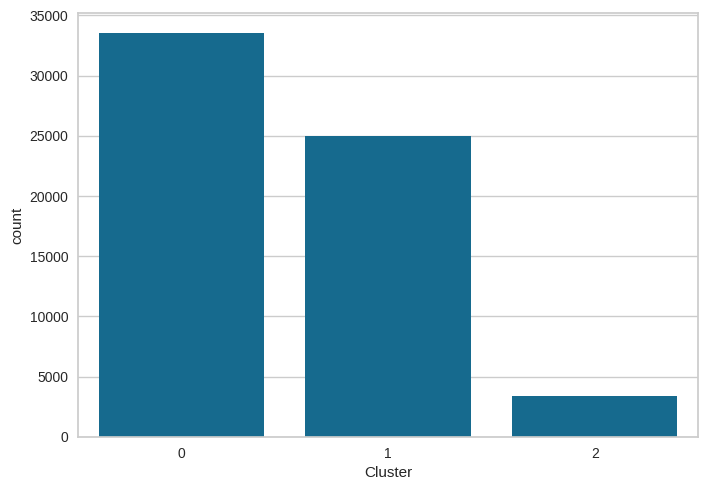

In [55]:
sns.countplot(x = rfm_uk['Cluster'])

In [56]:
# Grouping by cluster label and calculate mean
cluster_averages = rfm_uk.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
Cluster,,,,,,,,,,,
0,196.957413,1.675570,14.604202,5.148324,0.404038,2.104691,3.303062,3.338188,2.954817,inf,9.596067
1,32.429435,2.798254,33.416890,3.189767,0.916073,2.998165,1.452857,2.347520,2.096689,inf,5.897065
2,82.851549,100.245470,1637.853517,3.626260,3.962956,6.699681,2.049386,1.000292,1.000000,inf,4.049679


##6. Interpretation

####**Cluster 0:**

Recency: High (average around 196 days)

Frequency: Low (average around 1 transactions)

Monetary: Low (average around $14)

Interpretation: Customers in this group are likely to be 'At-Risk' or 'Lapssesd' customers. They haven't made any recent purchase and when they did they neither purchased anything frequently nor they spent much. Engaging them with reactivation campaigns or exploring why they haven't returned can be a strategic move. But since the data is from an online gifting retail site, it can be derived that people dont buy gifts much frequently, unless they have any occasions to suffice the reaoning. Hence, if the former move to engage the customers doesn't work, seasonal offers and campaigns can be initiated for this segment of customers to have their loyalty to buy from this store whenever they have to buy gifts.

####**Cluster 1:**

Recency: Low (average around 32 days)

Frequency: Low (average around 3 transactions)

Monetary: Moderate (average around $33)

Interpretetion: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. This segment might consist of other third party retailers, so maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

####**Cluster 2:**

Recency: Moderate (average around 82 days)

Frequency: Moderate (average around 100 transactions)

Monetary: High (average around $1500 +)

Interpretetion: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

## **Conclusion**

The above above clustering is done with RFM data using K-Means Clustering as all 3 will provide the best information for the business requirement.

Cluster 0 has high Recency, low frequency and monetary value thus depicting the most risked class of the entire sample consisting of above 33,000 customers.

Cluster 1 has Low values in all recency, frequency and monetary value depicting about 25000+ golden customers.

Cluster 2 has moderate recency, frequency and monetary values consisting of about 3000+ loyal customers.